In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [158]:
################## List of all loads by total consumption in kWh in descedning order (13 months) ##################

data_set_loads = pd.read_csv('load_profiles/source/Gesamtverbrauchsdaten.csv', sep=';')
# Sum up kw/h for each row of all loads
total_energy_consumption = {}
for elem in range(1,201):
    total = data_set_loads[str(elem)].sum()
    total_energy_consumption[elem] = round(total, 2)

# Calculate max/min
#print(max(total_energy_consumption.items(), key = lambda k : k[1]))
#print(min(total_energy_consumption.items(), key = lambda k : k[1]))

# Sort to descending dict
sorted_loads = {k: v for k, v in sorted(total_energy_consumption.items(), key=lambda item: item[1], reverse=True)}

# Display it properly
print("{:<8} {:<15}".format('Key','Number'))
for k,v in sorted_loads.items():
    num = v
    print("{:<8} {:<15}".format(k, num))

Key      Number         
101      9028.57        
120      8804.08        
33       7992.44        
150      7864.43        
147      7720.96        
165      7237.13        
19       7025.58        
136      6772.56        
90       6625.65        
5        6514.21        
177      6481.01        
32       6356.2         
65       6200.78        
140      6111.17        
159      6047.3         
181      5849.23        
142      5822.55        
9        5789.98        
39       5715.11        
182      5677.32        
130      5672.05        
200      5318.71        
81       5276.55        
184      5265.42        
152      5168.49        
117      5161.81        
80       5115.49        
170      5102.8         
103      5102.4         
55       5100.92        
91       5068.29        
188      4952.5         
196      4897.72        
124      4894.22        
166      4867.35        
17       4822.17        
154      4678.76        
10       4659.49        
149      4644.83        


In [7]:
################## Select load ##################
# 150, 117, 58, 30
use_cols = '150'

################## load profiles of 200 german households (13 months) ##################
energy_profile = pd.read_csv(r'load_profiles/source/Gesamtverbrauchsdaten.csv', sep=';',usecols = [use_cols]).rename(columns={use_cols: f'load_{use_cols}'})

df = pd.DataFrame()
df['interval'] = (pd.DataFrame(columns=['INTERVAL'],
                  index=pd.date_range('2019-01-01T00:00:00Z', '2020-01-31T23:45:00Z',
                                      freq='15T'))
       #.between_time('0:00','23:59')
       .index.strftime('%Y-%m-%dT%H:%M')
       .tolist()
        )
df = df.join(energy_profile[f'load_{use_cols}'], how='right')
df = df.rename(columns={f'load_{use_cols}': 'kWh'})
df_2019 = df.head(35040)
df_2020 = df.tail(2976)

################## Change file name ##################
df_2019.to_csv(f'load_profiles/load_4/load_profile_id={use_cols}_2019.csv', index=False)
################## Change file name ##################
df_2020.to_csv(f'load_profiles/load_4/load_profile_id={use_cols}_2020.csv', index=False)

################## Calculate kW peak PV ##################
kw_peak = ((1.44*df_2019['kWh'].sum()/365)/3.0).round()
print(f'Total kW peak rating: {kw_peak} (factor: 3.00)')


Total kW peak rating: 10.0 (factor: 3.00)


In [77]:
################## Change file ##################
pv_profile_hourly = pd.read_csv('pv_profiles/source/pv_4/source_pv_profile_id=30_2019.csv', comment='#') 

################## Change year ##################
df = pd.DataFrame()
df['interval'] = (pd.DataFrame(columns=['INTERVAL'],
                  index=pd.date_range('2019-01-01T00:00:00Z', '2019-12-31T23:45:00Z',
                                      freq='15T'))
       #.between_time('0:00','23:59')
       .index.strftime('%Y-%m-%dT%H:%M')
       .tolist()
        )

################## Transform from hourly to 15 min time slots in kWh
elec = []
market_slots_pv_production = []
elec = pv_profile_hourly['electricity']

for value in elec:
    for n in range(0,4):
        market_slots_pv_production.append(value)
        
df['kWh'] = market_slots_pv_production
#df = df.rename(columns={'kWh': 'pv_150'})

################## Change file name ##################
df.to_csv('pv_profiles/pv_4/pv_profile_id=30_2019.csv', index=False)

Daily average consumption in kWh: Load    6.96
dtype: float64
Daily average production in kWh: Pv    50.02
dtype: float64


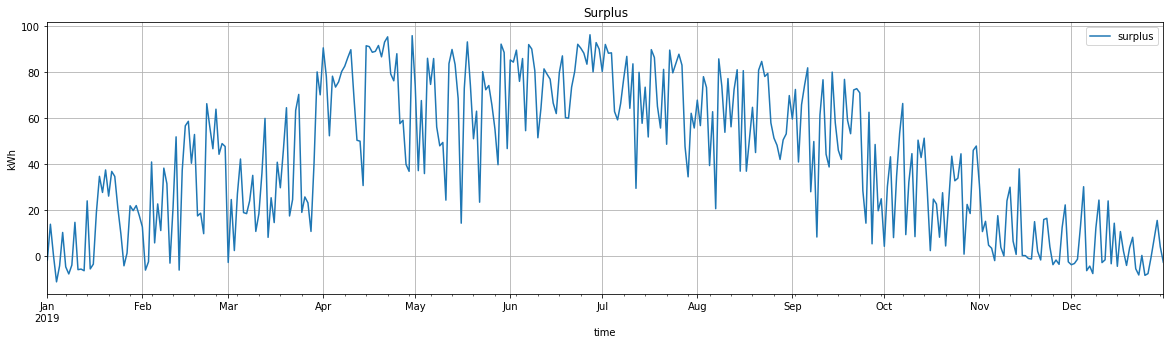

In [78]:
################## Calculate surplus ##################
load_profile = pd.read_csv('load_profiles/load_4/load_profile_id=30_2019.csv')
pv_profile = pd.read_csv('pv_profiles/pv_4/pv_profile_id=30_2019.csv')
load_profile = load_profile.rename(columns={'kWh': 'Load'})
pv_profile = pv_profile.rename(columns={'kWh': 'Pv'})

# Load: DateTime String to DateTime Object
load_df = load_profile
load_df['interval'] = pd.to_datetime(load_profile['interval'])
load_df = load_df.set_index('interval')

# PV: DateTime String to DateTime Object
pv_df = pv_profile
pv_df['interval'] = pd.to_datetime(pv_profile['interval'])
pv_df = pv_df.set_index('interval')

# Daily average LOAD CONSUMPTION
load_df = load_df['Load'].resample('D').sum()
# Load profiles contain 13 months
load_df = load_df.head(365)
load_df = load_df.to_frame()
daily_average_load = round(load_df.mean(),2)
print(f'Daily average consumption in kWh: {daily_average_load}')

# Daily average PV PRODUCTION
pv_df = pv_df['Pv'].resample('D').sum()
pv_df = pv_df.to_frame()
daily_average_pv = round(pv_df.mean(),2)
print(f'Daily average production in kWh: {daily_average_pv}')


df = pd.DataFrame()
df['interval'] = (pd.DataFrame(columns=['INTERVAL'],
                  index=pd.date_range('2019-01-01T00:00:00Z', '2019-12-31T23:45:00Z',
                                      freq='1D'))
       #.between_time('0:00','23:59')
       .index.strftime('%Y-%m-%d')
       .tolist()
        )
df.set_index('interval', inplace=True)
df = df.join(pv_df['Pv'], how='right').join(load_df['Load'], how='right')
df['surplus'] = df.apply(lambda row: row.Pv - row.Load , axis=1)
#df = df.rename(columns={'kWh': 'pv_150'})

df.plot(kind='line', y='surplus', grid=True, ylabel='kWh', xlabel='time', figsize=(20,5), title='Surplus')

################## Save file and pdf if necesary to check data ##################
df.to_csv('data_verification/house_4/surplus_id=30.csv')
plt.savefig('data_verification/house_4/surplus_id=30.pdf')

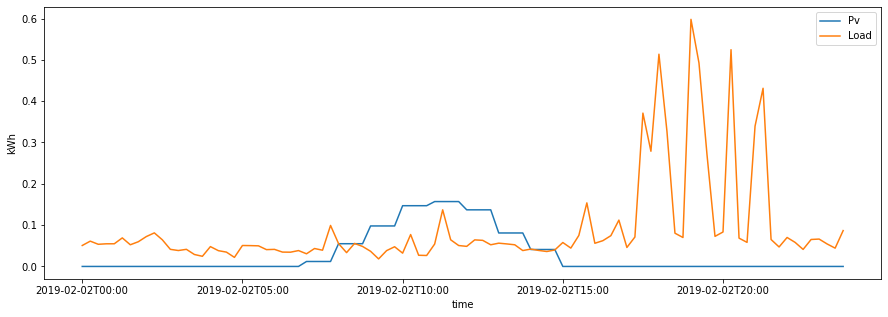

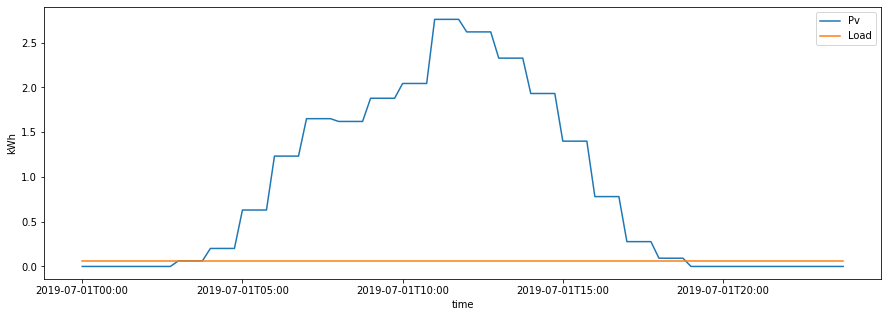

In [79]:
################## Check exemplary days ##################
load_profile = pd.read_csv('load_profiles/load_4/load_profile_id=30_2019.csv')
pv_profile = pd.read_csv('pv_profiles/pv_4/pv_profile_id=30_2019.csv')

load_profile = load_profile.rename(columns={'kWh': 'Load'})
pv_profile = pv_profile.rename(columns={'kWh': 'Pv'})

df = pd.DataFrame()
df['interval'] = (pd.DataFrame(columns=['INTERVAL'],
                  index=pd.date_range('2019-01-01T00:00:00Z', '2019-12-31T23:45:00Z',
                                      freq='15T'))
       #.between_time('0:00','23:59')
       .index.strftime('%Y-%m-%dT%H:%M')
       .tolist()
        )

df = df.join(pv_profile['Pv'], how='right').join(load_profile['Load'], how='right')
df = df.rename(columns={'kWh': 'pv_150'})

df.set_index('interval', inplace=True)

winter_day_df = df.loc['2019-02-02':'2019-02-03']
winter_day_df.plot(ylabel='kWh', xlabel='time', figsize=(15,5))
plt.savefig('data_verification/house_4/3th_feb.pdf')


summer_day_df = df.loc['2019-07-01': '2019-07-02']
summer_day_df.plot(ylabel='kWh', xlabel='time', figsize=(15,5))
plt.savefig('data_verification/house_4/1th_july.pdf')

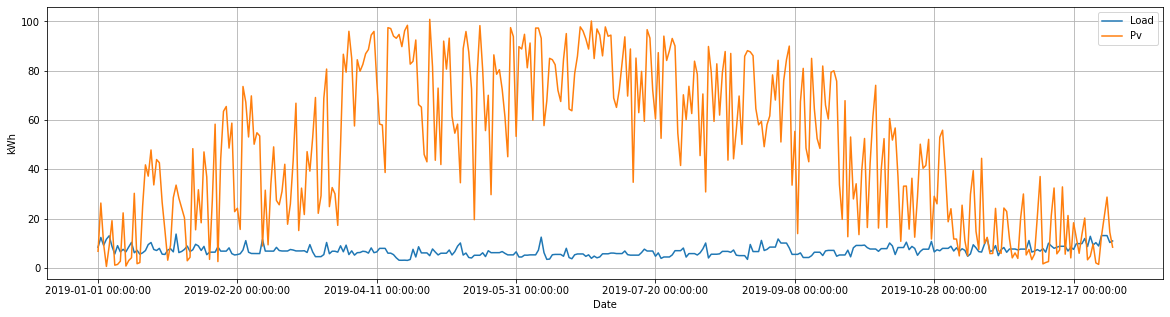

In [81]:
################## Energy profiles for household ##################
df = pd.read_csv('data_verification/house_4/surplus_id=30.csv')
df.plot(kind='line', x='interval', y=['Load','Pv'], grid=True, ylabel='kWh', xlabel='Date', figsize=(20,5))

plt.savefig('data_verification/house_4/energy_profile_household_30.pdf')

In [135]:
################## Load profile to Power (W) for simulation data requirements ##################
df_load = pd.read_csv('load_profiles/load_4/load_profile_id=30_2019.csv')
df_load_4020 = pd.read_csv('load_profiles/load_4/load_profile_id=30_2020.csv')

################## 2019 ##################
df_load.iloc[:, 1] = df_load.iloc[:, 1].apply(lambda x: (x*4)*1000)

df_load = df_load.rename(columns={'kWh': 'Power (W)'})
df_load.to_csv('load_profiles/sim_load_profiles_watt/load_4/load_profile_id=30_2019_watt.csv', index=False)

################## 2020 ##################
df_load_4020.iloc[:, 1] = df_load_4020.iloc[:, 1].apply(lambda x: (x*4)*1000)

df_load_4020 = df_load_4020.rename(columns={'kWh': 'Power (W)'})
df_load_4020.to_csv('load_profiles/sim_load_profiles_watt/load_4/load_profile_id=30_2020_watt.csv', index=False)

################## PV profile to Power (W) for simulation data requirements ##################
df_pv = pd.read_csv('pv_profiles/pv_4/pv_profile_id=30_2019.csv')

df_pv.iloc[:, 1] = df_pv.iloc[:, 1].apply(lambda x: (x*4)*1000)
df_pv = df_pv.rename(columns={'kWh': 'Power (W)'})
df_pv.to_csv('pv_profiles/sim_pv_profiles_watt/pv_4/pv_profile_id=30_2019_watt.csv', index=False)

In [137]:
df_2020 = pd.read_csv('pv_profiles/source/pv_4/2020_original/source_pv_profile_id=30_2020.csv', comment='#')
df_jan = df_2020.head(744)
df_jan.to_csv('pv_profiles/source/pv_4/pv_profile_id=30_2020_jan.csv', index=False)

################## Change file ##################
pv_profile_hourly = pd.read_csv('pv_profiles/source/pv_4/pv_profile_id=30_2020_jan.csv') 

################## Change year ##################
df = pd.DataFrame()
df['interval'] = (pd.DataFrame(columns=['INTERVAL'],
                  index=pd.date_range('2020-01-01T00:00:00Z', '2020-01-31T23:45:00Z',
                                      freq='15T'))
       #.between_time('0:00','23:59')
       .index.strftime('%Y-%m-%dT%H:%M')
       .tolist()
        )
################## Transform from hourly to 15 min time slots in kWh
elec = []
market_slots_pv_production = []
elec = pv_profile_hourly['electricity']

for value in elec:
    for n in range(0,4):
        market_slots_pv_production.append(value)
        
df['kWh'] = market_slots_pv_production

################## Change file name ##################
df.to_csv('pv_profiles/pv_4/pv_profile_id=30_2020_jan.csv', index=False)

################## PV profile to Power (W) for simulation data requirements ##################
df_pv_watt = pd.read_csv('pv_profiles/pv_4/pv_profile_id=30_2020_jan.csv')

df_pv_watt.iloc[:, 1] = df_pv_watt.iloc[:, 1].apply(lambda x: (x*4)*1000)
df_pv_watt = df_pv_watt.rename(columns={'kWh': 'Power (W)'})
df_pv_watt.to_csv('pv_profiles/sim_pv_profiles_watt/pv_4/pv_profile_id=30_2020_watt.csv', index=False)

In [6]:
################## Weather data from hourly to 15 min time slots ##################
years = ['2018','2019', '2020']
house = 'house_4'
# 150,117,58,30
id = '30'
    
for y in years:
    df_weather = pd.read_csv(f'weather_data/{house}/weather_id={id}_{y}.csv', comment='#')
    df = pd.DataFrame()
    df['interval'] = (pd.DataFrame(columns=['INTERVAL'],
                      index=pd.date_range(f'{y}-01-01T00:00:00Z', f'{y}-12-31T23:45:00Z',
                                          freq='15T'))
           #.between_time('0:00','23:59')
           .index.strftime('%Y-%m-%dT%H:%M')
           .tolist()
            )
    columns = ['temperature','radiation_surface','cloud_cover']
    for col in columns:
        transformed_slots = []
        tmp = df_weather[col]
        for value in tmp:
            for n in range(0,4):
                transformed_slots.append(value)
        df[col] = transformed_slots
    df.to_csv(f'weather_data/{house}/weather_id={id}_{y}_15min.csv', index=False)

In [14]:
################## Forecasted data to kWh ##################
id = [150, 117, 58, 30]

for i in range(0,4):
    df_load = pd.read_csv(f'load_forecast_data/forecast_load_d3a_format/load_forecast_id={id[i]}_load={i+1}.csv')
    df_load.iloc[:, 1] = df_load.iloc[:, 1].apply(lambda x: round((x/1000)/4, 3))
    df_load = df_load.rename(columns={f'Power (W)': 'kWh'})
    df_pv = pd.read_csv(f'pv_forecast_data/forecast_pv_d3a_format/pv_forecast_id={id[i]}_pv={i+1}.csv')
    df_pv.iloc[:, 1] = df_pv.iloc[:, 1].apply(lambda x: round((x/1000)/4, 3))
    df_pv = df_pv.rename(columns={f'Power (W)': 'kWh'})
    df_load.to_csv(f'load_forecast_data/forecast_kwh/load_forecast_id={id[i]}_load_{i+1}_kwh.csv')
    df_pv.to_csv(f'pv_forecast_data/forecast_kWh/pv_forecast_id={id[i]}_pv_{i+1}_kwh.csv')

In [13]:
################## Generate energy profile with constant power (11kW)
df = pd.DataFrame()
df['interval'] = (pd.DataFrame(columns=['INTERVAL'],
                  index=pd.date_range('2020-01-01T00:00:00Z', '2020-01-31T23:45:00Z',
                                      freq='15T'))
       #.between_time('0:00','23:59')
       .index.strftime('%Y-%m-%dT%H:%M')
       .tolist()
        )

df['Power (W)'] = 11000
df.to_csv('constant_power.csv', index=False)

In [8]:
################## Generate energy profile with constant power (11kW)
df = pd.DataFrame()
df['interval'] = (pd.DataFrame(columns=['INTERVAL'],
                  index=pd.date_range('2019-01-01T00:00:00Z', '2019-12-31T23:45:00Z',
                                      freq='15T'))
       #.between_time('0:00','23:59')
       .index.strftime('%Y-%m-%dT%H:%M')
       .tolist()
        )

df['Power (W)'] = 11000
df.to_csv('constant_power_2019.csv', index=False)

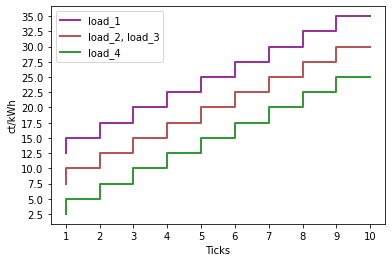

In [93]:
""" Naive strategies loads """
index = range(1,11)
load_1 = np.arange(12.5, 37.5, 2.5)
load_2 = np.arange(7.5, 32.5, 2.5)
load_3 = np.arange(7.5, 32.5, 2.5)
load_4 = np.arange(2.5, 27.5, 2.5)

# Plot loads
plt.step(index, load_1, alpha=0.8, linewidth=2, color="purple", label="load_1")
plt.step(index, load_2, alpha=0.8, linewidth=2, color="brown", label="load_2, load_3")
plt.step(index, load_4, alpha=0.8, linewidth=2, color="green", label="load_4")
plt.yticks(np.arange(load_4.min(), load_1.max()+2.5, 2.5))
plt.xticks(np.arange(1,11, 1))
plt.xlabel('Ticks')
plt.ylabel('ct/kWh')
#plt.grid()
plt.legend()
#plt.show()
plt.savefig('experiment_setup_plots/load_strategies.pdf')

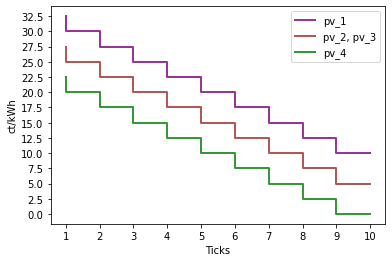

In [94]:
""" Naive strategies PVs """
index = range(1,11)
pv_1 = np.arange(32.5, 7.5, -2.5)
pv_2 = np.arange(27.5, 2.5, -2.5)
pv_3 = np.arange(27.5, 2.5, -2.5)
pv_4 = np.arange(22.5, -2.5, -2.5)

# Plot PVs
plt.step(index, pv_1, alpha=0.8, linewidth=2, color="purple", label="pv_1")
plt.step(index, pv_2, alpha=0.8, linewidth=2, color="brown", label="pv_2, pv_3")
plt.step(index, pv_4, alpha=0.8, linewidth=2, color="green", label="pv_4")
plt.yticks(np.arange(pv_4.min(), pv_1.max()+2.5, 2.5))
plt.xticks(np.arange(1,11, 1))
plt.xlabel('Ticks')
plt.ylabel('ct/kWh')
plt.legend()
#plt.show()
plt.savefig('experiment_setup_plots/pv_strategies.pdf')

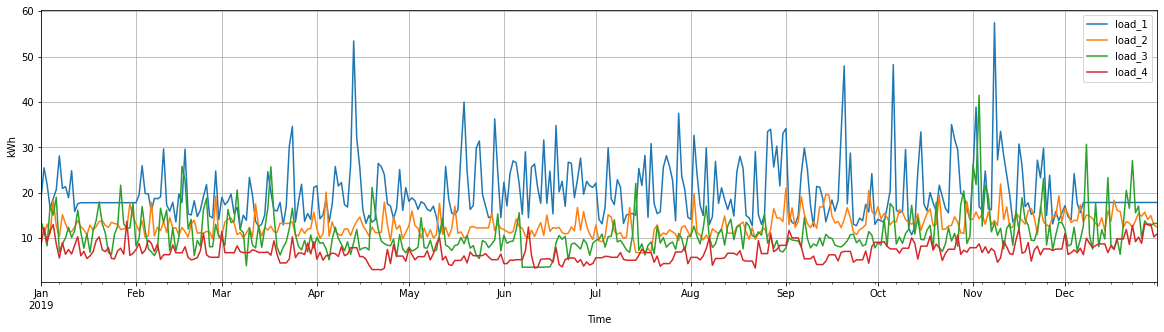

In [122]:
load_1 = pd.read_csv('load_profiles/load_1/load_profile_id=150_2019.csv')
load_2 = pd.read_csv('load_profiles/load_2/load_profile_id=117_2019.csv')
load_3 = pd.read_csv('load_profiles/load_3/load_profile_id=58_2019.csv')
load_4 = pd.read_csv('load_profiles/load_4/load_profile_id=30_2019.csv')

load_1['interval'] = pd.to_datetime(load_1['interval'])
load_1 = load_1.set_index('interval')
load_1 = load_1['kWh'].resample('D').sum()
load_1.plot(label='load_1')

load_2['interval'] = pd.to_datetime(load_2['interval'])
load_2 = load_2.set_index('interval')
load_2 = load_2['kWh'].resample('D').sum()
load_2.plot(label='load_2')

load_3['interval'] = pd.to_datetime(load_3['interval'])
load_3 = load_3.set_index('interval')
load_3 = load_3['kWh'].resample('D').sum()
load_3.plot(label='load_3')

load_4['interval'] = pd.to_datetime(load_4['interval'])
load_4 = load_4.set_index('interval')
load_4 = load_4['kWh'].resample('D').sum()
load_4.plot(kind='line', y='kWh', grid=True, label='load_4', ylabel='kWh', xlabel='Time'
            , figsize=(20,5))
plt.legend()
plt.savefig('data_verification/aggregated_load_profiles_2019.pdf', bbox_inches='tight')

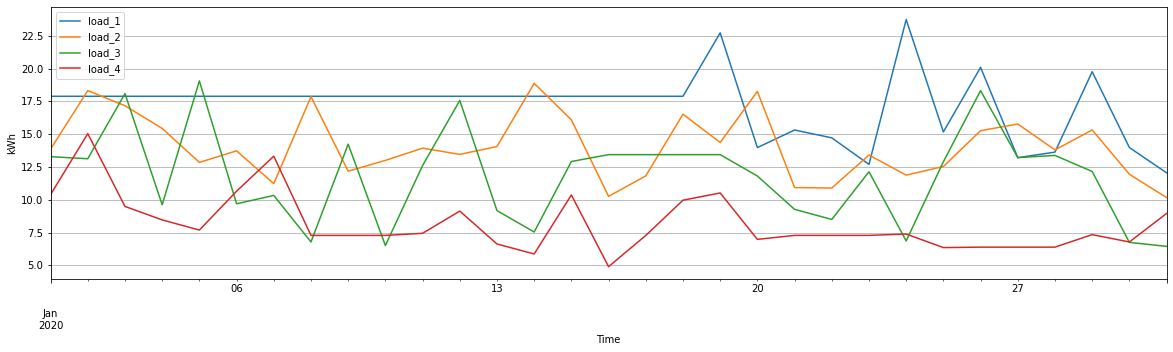

In [121]:
load_1 = pd.read_csv('load_profiles/load_1/load_profile_id=150_2020.csv')
load_2 = pd.read_csv('load_profiles/load_2/load_profile_id=117_2020.csv')
load_3 = pd.read_csv('load_profiles/load_3/load_profile_id=58_2020.csv')
load_4 = pd.read_csv('load_profiles/load_4/load_profile_id=30_2020.csv')

load_1['interval'] = pd.to_datetime(load_1['interval'])
load_1 = load_1.set_index('interval')
load_1 = load_1['kWh'].resample('D').sum()
load_1.plot(label='load_1')

load_2['interval'] = pd.to_datetime(load_2['interval'])
load_2 = load_2.set_index('interval')
load_2 = load_2['kWh'].resample('D').sum()
load_2.plot(label='load_2')

load_3['interval'] = pd.to_datetime(load_3['interval'])
load_3 = load_3.set_index('interval')
load_3 = load_3['kWh'].resample('D').sum()
load_3.plot(label='load_3')

load_4['interval'] = pd.to_datetime(load_4['interval'])
load_4 = load_4.set_index('interval')
load_4 = load_4['kWh'].resample('D').sum()
load_4.plot(kind='line', y='kWh', grid=True, label='load_4', ylabel='kWh', xlabel='Time'
            , figsize=(20,5))
plt.legend()
plt.savefig('data_verification/aggregated_load_profiles_2020.pdf', bbox_inches='tight')

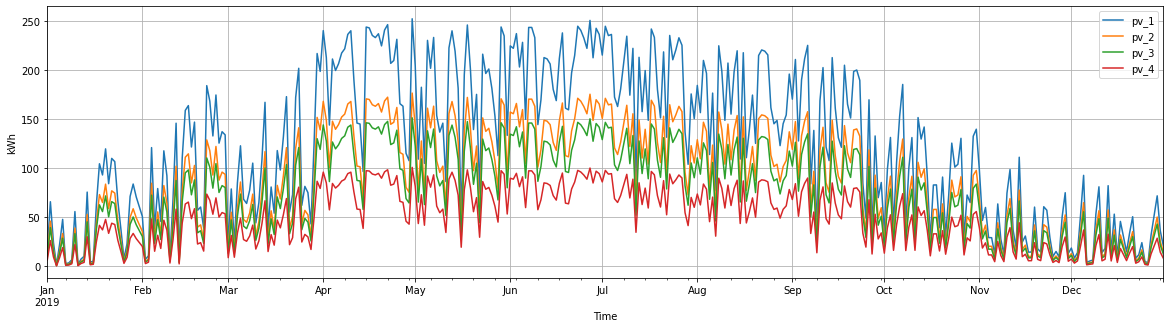

In [120]:
pv_1 = pd.read_csv('pv_profiles/pv_1/pv_profile_id=150_2019.csv')
pv_2 = pd.read_csv('pv_profiles/pv_2/pv_profile_id=117_2019.csv')
pv_3 = pd.read_csv('pv_profiles/pv_3/pv_profile_id=58_2019.csv')
pv_4 = pd.read_csv('pv_profiles/pv_4/pv_profile_id=30_2019.csv')

pv_1['interval'] = pd.to_datetime(pv_1['interval'])
pv_1 = pv_1.set_index('interval')
pv_1 = pv_1['kWh'].resample('D').sum()
pv_1.plot(label='pv_1')

pv_2['interval'] = pd.to_datetime(pv_2['interval'])
pv_2 = pv_2.set_index('interval')
pv_2 = pv_2['kWh'].resample('D').sum()
pv_2.plot(label='pv_2')

pv_3['interval'] = pd.to_datetime(pv_3['interval'])
pv_3 = pv_3.set_index('interval')
pv_3 = pv_3['kWh'].resample('D').sum()
pv_3.plot(label='pv_3')

pv_4['interval'] = pd.to_datetime(pv_4['interval'])
pv_4 = pv_4.set_index('interval')
pv_4 = pv_4['kWh'].resample('D').sum()
pv_4.plot(kind='line', y='kWh', grid=True, label='pv_4', ylabel='kWh', xlabel='Time'
            , figsize=(20,5))
plt.legend()
plt.savefig('data_verification/aggregated_pv_profiles_2019.pdf', bbox_inches='tight')

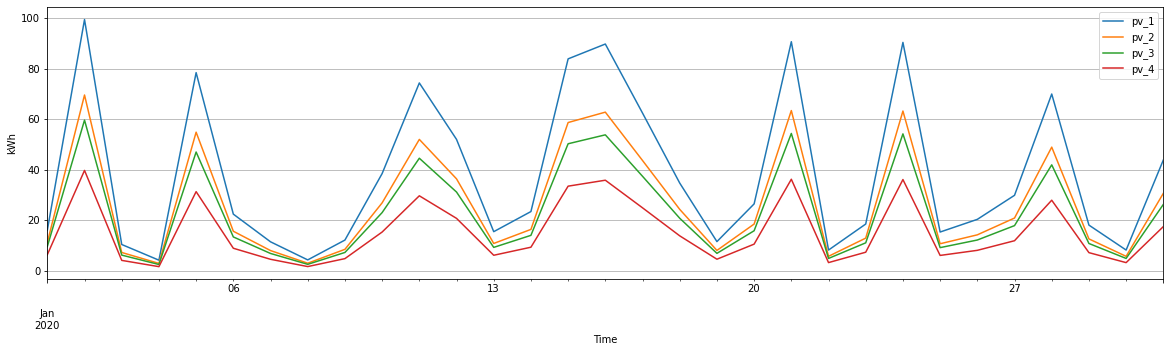

In [119]:
pv_1 = pd.read_csv('pv_profiles/pv_1/pv_profile_id=150_2020_jan.csv')
pv_2 = pd.read_csv('pv_profiles/pv_2/pv_profile_id=117_2020_jan.csv')
pv_3 = pd.read_csv('pv_profiles/pv_3/pv_profile_id=58_2020_jan.csv')
pv_4 = pd.read_csv('pv_profiles/pv_4/pv_profile_id=30_2020_jan.csv')

pv_1['interval'] = pd.to_datetime(pv_1['interval'])
pv_1 = pv_1.set_index('interval')
pv_1 = pv_1['kWh'].resample('D').sum()
pv_1.plot(label='pv_1')

pv_2['interval'] = pd.to_datetime(pv_2['interval'])
pv_2 = pv_2.set_index('interval')
pv_2 = pv_2['kWh'].resample('D').sum()
pv_2.plot(label='pv_2')

pv_3['interval'] = pd.to_datetime(pv_3['interval'])
pv_3 = pv_3.set_index('interval')
pv_3 = pv_3['kWh'].resample('D').sum()
pv_3.plot(label='pv_3')

pv_4['interval'] = pd.to_datetime(pv_4['interval'])
pv_4 = pv_4.set_index('interval')
pv_4 = pv_4['kWh'].resample('D').sum()
pv_4.plot(kind='line', y='kWh', grid=True, label='pv_4', ylabel='kWh', xlabel='Time'
            , figsize=(20,5))
plt.legend()
plt.savefig('data_verification/aggregated_pv_profiles_2020.pdf', bbox_inches='tight')

In [6]:
pv_1 = pd.read_csv('pv_profiles/pv_1/pv_profile_id=150_2020_jan.csv')
pv_2 = pd.read_csv('pv_profiles/pv_2/pv_profile_id=117_2020_jan.csv')
pv_3 = pd.read_csv('pv_profiles/pv_3/pv_profile_id=58_2020_jan.csv')
pv_4 = pd.read_csv('pv_profiles/pv_4/pv_profile_id=30_2020_jan.csv')

pv_1_sum = pv_1['kWh'].sum()
pv_2_sum = pv_2['kWh'].sum()
pv_3_sum = pv_3['kWh'].sum()
pv_4_sum = pv_4['kWh'].sum()

print(pv_1_sum)
print(pv_2_sum)
print(pv_3_sum)
print(pv_4_sum)

1188.008
831.3879999999999
712.576
475.168


In [7]:
load_1 = pd.read_csv('load_profiles/load_1/load_profile_id=150_2020.csv')
load_2 = pd.read_csv('load_profiles/load_2/load_profile_id=117_2020.csv')
load_3 = pd.read_csv('load_profiles/load_3/load_profile_id=58_2020.csv')
load_4 = pd.read_csv('load_profiles/load_4/load_profile_id=30_2020.csv')

load_1_sum = load_1['kWh'].sum()
load_2_sum = load_2['kWh'].sum()
load_3_sum = load_3['kWh'].sum()
load_4_sum = load_4['kWh'].sum()

print(load_1_sum)
print(load_2_sum)
print(load_3_sum)
print(load_4_sum)

533.0785678286011
435.1949457315986
366.0263373753986
253.78815690769977


In [19]:
forecast_load_1 = pd.read_csv('load_forecast_data/forecast_kwh/load_forecast_id=150_load_1_kwh.csv')
forecast_load_2 = pd.read_csv('load_forecast_data/forecast_kwh/load_forecast_id=117_load_2_kwh.csv')
forecast_load_3 = pd.read_csv('load_forecast_data/forecast_kwh/load_forecast_id=58_load_3_kwh.csv')
forecast_load_4 = pd.read_csv('load_forecast_data/forecast_kwh/load_forecast_id=30_load_4_kwh.csv')

forecast_load_1_sum = forecast_load_1['kWh'].sum()
forecast_load_2_sum = forecast_load_2['kWh'].sum()
forecast_load_3_sum = forecast_load_3['kWh'].sum()
forecast_load_4_sum = forecast_load_4['kWh'].sum()

print(forecast_load_1_sum)
print(forecast_load_2_sum)
print(forecast_load_3_sum)
print(forecast_load_4_sum)

567.0070000000001
445.58200000000005
348.62699999999995
245.159


In [20]:
forecast_pv_1 = pd.read_csv('pv_forecast_data/forecast_kwh/pv_forecast_id=150_pv_1_kwh.csv')
forecast_pv_2 = pd.read_csv('pv_forecast_data/forecast_kwh/pv_forecast_id=117_pv_2_kwh.csv')
forecast_pv_3 = pd.read_csv('pv_forecast_data/forecast_kwh/pv_forecast_id=58_pv_3_kwh.csv')
forecast_pv_4 = pd.read_csv('pv_forecast_data/forecast_kwh/pv_forecast_id=30_pv_4_kwh.csv')

forecast_pv_1_sum = forecast_pv_1['kWh'].sum()
forecast_pv_2_sum = forecast_pv_2['kWh'].sum()
forecast_pv_3_sum = forecast_pv_3['kWh'].sum()
forecast_pv_4_sum = forecast_pv_4['kWh'].sum()

print(forecast_pv_1_sum)
print(forecast_pv_2_sum)
print(forecast_pv_3_sum)
print(forecast_pv_4_sum)

1136.864
794.22
663.556
459.68399999999997


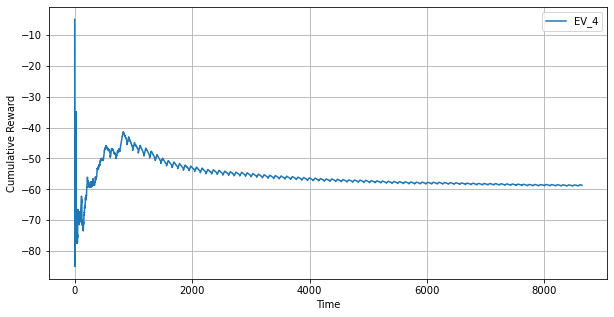

In [54]:
df = pd.read_csv('../test_case_4_training/ev_4_results.csv')

mylist = list(range(1, 8640))
values = df['reward'].value_counts()
df = df.cumsum()
df['new_index'] = mylist
df
df['cum_reward'] = df.apply(lambda row: row.reward / row.new_index , axis=1)
df

df.plot(kind='line', y='cum_reward', grid=True, label='EV_4', ylabel='Cumulative Reward', xlabel='Time'
               , figsize=(10,5))
plt.savefig('../test_case_4_training/cum_rew_test_case_4_ev4.pdf', bbox_inches='tight')